# Import Needed Modules

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2025-11-17 01:20:03.787670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763342403.998684      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763342404.057968      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

# Data Representation

In [3]:
df_fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
df_true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_true['labels'] = 1
df_fake['labels'] = 0

df = pd.concat([df_true,df_fake],ignore_index=True)
df.drop(columns = ['title','subject','date'],inplace = True)
print(df.head())
print(df.shape)

                                                text  labels
0  WASHINGTON (Reuters) - The head of a conservat...       1
1  WASHINGTON (Reuters) - Transgender people will...       1
2  WASHINGTON (Reuters) - The special counsel inv...       1
3  WASHINGTON (Reuters) - Trump campaign adviser ...       1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...       1
(44898, 2)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   labels  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


# Data Cleaning

In [8]:
df.duplicated().sum()

6251

In [9]:
df.isna().sum()

text      0
labels    0
dtype: int64

In [10]:
df = df.drop_duplicates()
df.shape

(38647, 2)

# Data Preprocessing

In [11]:
y = df['labels']

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

In [13]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 's': 8,
 'on': 9,
 'for': 10,
 'is': 11,
 'said': 12,
 'he': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'at': 26,
 'this': 27,
 'are': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'but': 32,
 'u': 33,
 'would': 34,
 'president': 35,
 'we': 36,
 'i': 37,
 'will': 38,
 'about': 39,
 'had': 40,
 '”': 41,
 't': 42,
 'their': 43,
 'you': 44,
 'been': 45,
 'people': 46,
 'were': 47,
 'more': 48,
 'or': 49,
 'which': 50,
 'after': 51,
 'one': 52,
 'she': 53,
 'if': 54,
 'out': 55,
 'her': 56,
 'state': 57,
 'all': 58,
 'reuters': 59,
 'what': 60,
 'its': 61,
 'also': 62,
 'when': 63,
 'new': 64,
 'up': 65,
 'donald': 66,
 'there': 67,
 'no': 68,
 'house': 69,
 'over': 70,
 'government': 71,
 'republican': 72,
 'states': 73,
 'so': 74,
 'him': 75,
 'can': 76,
 'than': 77,
 'our': 78,
 'year': 79,
 'some': 80,
 'clinton'

In [14]:
sequences = tokenizer.texts_to_sequences(df['text'])

In [15]:
max_seq_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_seq_len)

In [16]:
X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_dummy, y_dummy, test_size=0.5, random_state=42)

In [17]:
word_counts = len(tokenizer.word_index) +  1

# Model Building

In [18]:
model = Sequential([
    Embedding(word_counts, 300, input_length=max_seq_len),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1763342441.049153      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
)

Epoch 1/10


I0000 00:00:1763342448.937301     108 cuda_dnn.cc:529] Loaded cuDNN version 90300


967/967 ━━━━━━━━━━━━━━━━━━━━ 1188s 1s/step - accuracy: 0.9183 - loss: 0.1994 - val_accuracy: 0.9868 - val_loss: 0.1294
Epoch 2/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 1186s 1s/step - accuracy: 0.9830 - loss: 0.0626 - val_accuracy: 0.9539 - val_loss: 0.1122
Epoch 3/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 1191s 1s/step - accuracy: 0.9971 - loss: 0.0110 - val_accuracy: 0.9972 - val_loss: 0.0103
Epoch 4/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 1191s 1s/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9990 - val_loss: 0.0034
Epoch 5/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 1198s 1s/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9987 - val_loss: 0.0038
Epoch 6/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 1200s 1s/step - accuracy: 1.0000 - loss: 3.3358e-04 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 7/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 1195s 1s/step - accuracy: 1.0000 - loss: 7.7764e-05 - val_accuracy: 0.9987 - val_loss: 0.0033
Epoch 8/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 1206s 1s/step - accuracy: 1.0000 - loss: 4.0467e-05 -

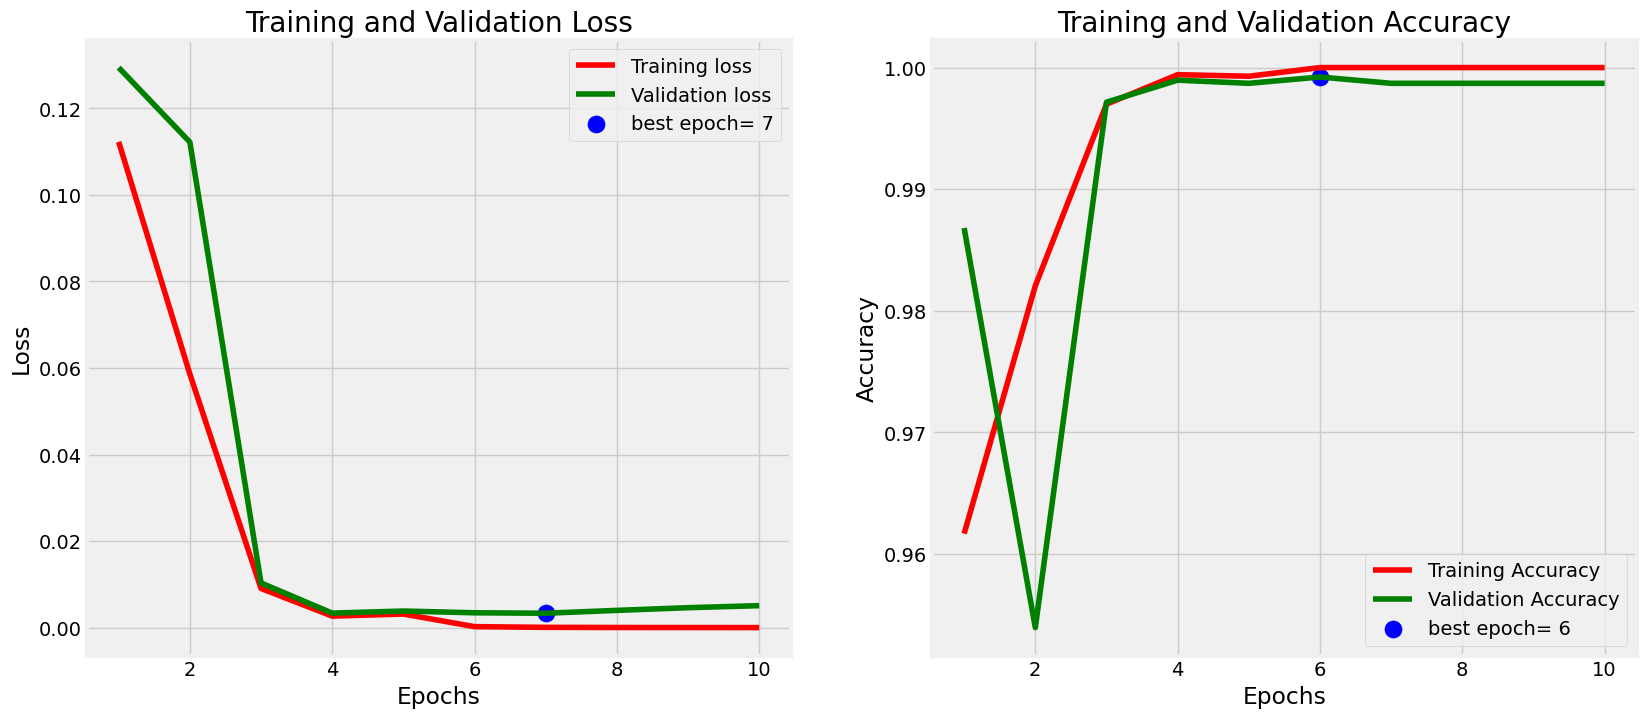

In [20]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()